# Assumptions

- every 3rd segment is a searching segment
- we have timeseries as data, i.e the lowest id is the first datum and the highest id the last
- there are 8 components per run

# Import

In [1]:
## Suppress warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

## Notebook display settings
from IPython.display import display
pd.options.display.max_columns = None

# Own scripts
from functions import get_start_end_points, plot_data, mean_between_neighbors, generate_histogram2d
## Plot style
%matplotlib inline

# Data

In [2]:
with open('data.pickle', 'rb') as handle:
    data = pickle.load(handle)
data.head()

,id,run,timestamp,segment,start_time,end_time,force_x,force_y,force_z,pos_x,pos_y,pos_z,rot_x,rot_y,rot_z,result_robot
0,163.0,0.0,2017-05-30 09:21:13.150,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.543045,-2.924596,-7.257000,-257.695704,-265.980105,240.007357,-0.008832,0.034723,179.958414,Success
1,164.0,0.0,2017-05-30 09:21:13.200,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.465969,-3.278856,-7.522000,-257.617629,-265.999590,240.004745,-0.000171,0.019928,179.968161,Success
2,165.0,0.0,2017-05-30 09:21:13.250,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.317475,-3.435834,-7.705999,-256.626803,-266.602650,239.791224,-179.993978,179.989304,0.164766,Success
3,166.0,0.0,2017-05-30 09:21:13.300,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.298383,-3.457754,-7.580999,-254.594017,-267.926090,239.323013,-179.992478,179.999036,0.577883,Success
4,167.0,0.0,2017-05-30 09:21:13.350,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.289898,-3.447854,-7.539000,-251.411919,-269.894497,238.550625,-179.996649,179.988091,1.210269,Success


# Code

## Lists

Find the starting and end points for the searching segments.

In [3]:
start_points, end_points, rel_end_points = get_start_end_points(data)

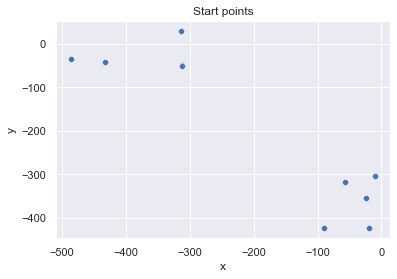

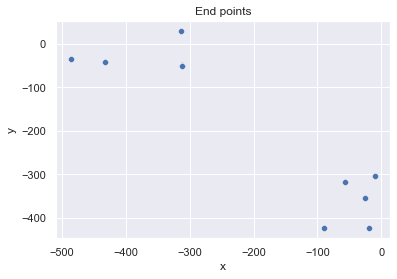

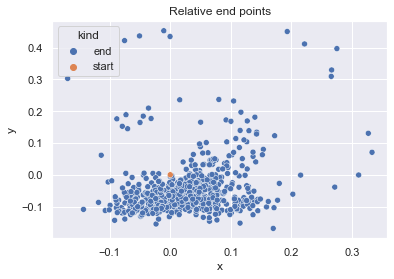

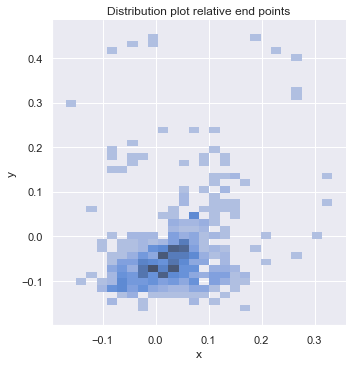

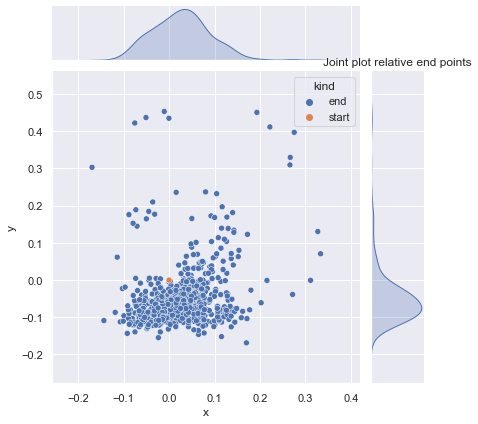

In [4]:
plot_data(start_points, end_points, rel_end_points)

In [5]:
hist, xedge, yedge = generate_histogram2d(rel_end_points)

In [6]:
sns.heatmap(np.flipud(np.swapaxes(hist,0,1)), xticklabels=mean_between_neighbors(xedge), yticklabels=np.flipud(mean_between_neighbors(yedge)))
#plt.axis("equal")
#plt.show()

NameError: name 'sns' is not defined

In [ ]:
# Taken from https://stackoverflow.com/questions/36834505/creating-a-spiral-array-in-python / https://stackoverflow.com/a/36889800 and adapted for this case

from enum import Enum

class direction(Enum):
    # directions
    N = (0, -1)
    S = (0, 1)
    W = (-1, 0)
    E = (1, 0)

class turn(Enum):
    turn_right, turn_left = {direction.N.value: direction.E.value, direction.E.value: direction.S.value, direction.S.value: direction.W.value, direction.W.value: direction.N.value}, {direction.N.value: direction.W.value, direction.W.value: direction.S.value, direction.S.value: direction.E.value, direction.E.value: direction.N.value} # old -> new direction

def build_spiral(size_x: int, size_y: int, start_x: int, start_y: int, start_direction: direction, rotation: turn):
    assert(size_x > 0)
    assert(size_y > 0)
    assert(0 <= start_x < size_x)
    assert(0 <= start_y < size_y)
    assert(isinstance(start_direction, direction))
    assert(isinstance(rotation, turn))

    width = max(start_x, size_x - (start_x + 1)) * 2 + 1
    height = max(start_y, size_y - (start_y + 1)) * 2 + 1

    # only with squared arrays will there be no edge cases
    length = max(width, height)

    x, y = length // 2, length // 2 # start in the center
    dx, dy = start_direction.value
    matrix = [[None] * length for _ in range(length)]
    #print(matrix)
    count = 0

    while True:
        matrix[y][x] = count
        count += 1
        #print(matrix)

        new_dx, new_dy = rotation.value[dx,dy]
        new_x, new_y = x + new_dx, y + new_dy

        if (0 <= new_x < length and 0 <= new_y < length and matrix[new_y][new_x] is None): # can turn right
            x, y = new_x, new_y
            dx, dy = new_dx, new_dy
        else: # try to move straight
            x, y = x + dx, y + dy
            if not (0 <= x < length and 0 <= y < length):
                result = np.array(matrix)
                #print(result)
                # lower bounds for the slice to match the wanted dimensions
                x_lb = length//2 - start_x
                #print(x_lb)
                y_lb = length//2 - start_y
                #print(y_lb)
                return result[x_lb: (x_lb + size_x), y_lb:(y_lb + size_y)]          


In [ ]:
res = build_spiral(10,7,2,3,direction.N,turn.turn_left)
print(res)
print()
print(np.flipud(np.swapaxes(res, 0, 1)))

[[ 25  24  23  22  21  20  41]
 [ 26   9   8   7   6  19  40]
 [ 27  10   1   0   5  18  39]
 [ 28  11   2   3   4  17  38]
 [ 29  12  13  14  15  16  37]
 [ 30  31  32  33  34  35  36]
 [ 57  58  59  60  61  62  63]
 [ 92  93  94  95  96  97  98]
 [135 136 137 138 139 140 141]
 [186 187 188 189 190 191 192]]

[[ 41  40  39  38  37  36  63  98 141 192]
 [ 20  19  18  17  16  35  62  97 140 191]
 [ 21   6   5   4  15  34  61  96 139 190]
 [ 22   7   0   3  14  33  60  95 138 189]
 [ 23   8   1   2  13  32  59  94 137 188]
 [ 24   9  10  11  12  31  58  93 136 187]
 [ 25  26  27  28  29  30  57  92 135 186]]
